<a href="https://colab.research.google.com/github/zinseo964/dam_flow/blob/main/damwithday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rain_data211 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172151.csv',encoding='cp949')
rain_data101 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172202.csv',encoding='cp949')
rain_data100 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172215.csv',encoding='cp949')
rain_data212 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172236.csv',encoding='cp949')
rain_data90 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172245.csv',encoding='cp949')

In [ ]:
# rain_data = pd.merge(rain_data211, rain_data101, how='outer')
from functools import reduce

rain_data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data211, rain_data101, rain_data100, rain_data212, rain_data90])

In [ ]:
print(rain_data)

              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
0     2009-01-01         NaN         NaN         NaN         NaN        NaN
1     2009-01-02         NaN         NaN         NaN         NaN        NaN
2     2009-01-03         NaN         NaN         NaN         NaN        NaN
3     2009-01-04         NaN         NaN         NaN         NaN        NaN
4     2009-01-05         NaN         NaN         NaN         NaN        NaN
...          ...         ...         ...         ...         ...        ...
5473  2023-12-27         NaN         NaN         NaN         NaN        NaN
5474  2023-12-28         NaN         NaN         NaN         NaN        NaN
5475  2023-12-29         NaN         NaN         NaN         NaN        NaN
5476  2023-12-30         6.8         9.9         2.3         8.5        0.7
5477  2023-12-31         3.1         5.3         6.0         4.9       26.8

[5478 rows x 6 columns]


In [ ]:
rain_col = [i for i in rain_data.columns if '강수' in i]
rain_data[rain_col] = rain_data[rain_col].fillna(0)

In [ ]:
print(rain_data.isna().sum().sum())
print(rain_data)

0
              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
0     2009-01-01         0.0         0.0         0.0         0.0        0.0
1     2009-01-02         0.0         0.0         0.0         0.0        0.0
2     2009-01-03         0.0         0.0         0.0         0.0        0.0
3     2009-01-04         0.0         0.0         0.0         0.0        0.0
4     2009-01-05         0.0         0.0         0.0         0.0        0.0
...          ...         ...         ...         ...         ...        ...
5473  2023-12-27         0.0         0.0         0.0         0.0        0.0
5474  2023-12-28         0.0         0.0         0.0         0.0        0.0
5475  2023-12-29         0.0         0.0         0.0         0.0        0.0
5476  2023-12-30         6.8         9.9         2.3         8.5        0.7
5477  2023-12-31         3.1         5.3         6.0         4.9       26.8

[5478 rows x 6 columns]


In [ ]:
dam_flow = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/only_dam_flow.csv',encoding='utf-8')

print(dam_flow)

              날짜  유입량(㎥/s)
0     2009-01-01     0.000
1     2009-01-02     0.825
2     2009-01-03     3.904
3     2009-01-04     0.000
4     2009-01-05     0.000
...          ...       ...
5473  2023-12-27    25.873
5474  2023-12-28    21.186
5475  2023-12-29    20.887
5476  2023-12-30    29.183
5477  2023-12-31    25.803

[5478 rows x 2 columns]


In [ ]:
data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data, dam_flow])

In [ ]:
print(max(data['유입량(㎥/s)']))

3918.5


<Axes: xlabel='날짜'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


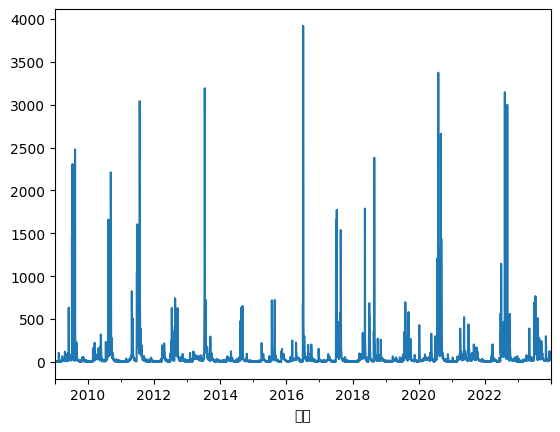

In [ ]:
data.index = pd.to_datetime(data['날짜'])

dam_flow = data['유입량(㎥/s)']
dam_flow.plot()

In [ ]:
data['Y'] = data['유입량(㎥/s)'].shift(-2)
data = data.dropna()

train = data[data['날짜']<'2018-01-01']
valid = data[data['날짜']>='2018-01-01']
valid = valid[valid['날짜']<'2023-01-01']
test = data[data['날짜']>='2023-01-01']
print('train set : ', len(train),"\n",
      'valid set : ', len(valid), "\n",
      'test set : ', len(test), "\n")

trainX, trainY = train.drop(['날짜', 'Y'], axis = 1), train['Y']
validX, validY = valid.drop(['날짜', 'Y'], axis = 1), valid['Y']
testX, testY = test.drop(['날짜', 'Y'], axis = 1), test['Y']

train set :  3287 
 valid set :  1826 
 test set :  363 



In [ ]:
print(trainX)
len(trainX.columns)

            211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)  \
날짜                                                                      
2009-01-01         0.0         0.0         0.0         0.0        0.0   
2009-01-02         0.0         0.0         0.0         0.0        0.0   
2009-01-03         0.0         0.0         0.0         0.0        0.0   
2009-01-04         0.0         0.0         0.0         0.0        0.0   
2009-01-05         0.0         0.0         0.0         0.0        0.0   
...                ...         ...         ...         ...        ...   
2017-12-27         0.0         0.0         0.0         0.0        0.0   
2017-12-28         0.0         0.0         0.0         0.0        0.0   
2017-12-29         0.0         0.0         0.0         0.0        0.0   
2017-12-30         0.4         1.0         0.3         0.6        0.0   
2017-12-31         1.0         1.1         0.0         2.0        0.0   

            유입량(㎥/s)  
날짜                    
2009

6

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import *
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((6, 1)))
model1.add(LSTM(64))
model1.add(Dense(40, 'relu'))
model1.add(Dense(40, 'relu'))
model1.add(Dense(40, 'relu'))
model1.add(Dense(8, 'relu'))
model1.add(Dense(8))
model1.add(Dense(1))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 40)                2600      
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 40)                1640      
                                                                 
 dense_3 (Dense)             (None, 8)                 328       
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9

In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model1.fit(trainX, trainY, batch_size=10, epochs=50, callbacks=[cp1])

Epoch 1/50
316/329 [===========================>..] - ETA: 0s - loss: 42710.9727 - root_mean_squared_error: 206.6663

329/329 [==============================] - 4s 3ms/step - loss: 44852.7695 - root_mean_squared_error: 211.7847
Epoch 2/50
329/329 [==============================] - ETA: 0s - loss: 41623.8906 - root_mean_squared_error: 204.0193

329/329 [==============================] - 1s 3ms/step - loss: 41623.8906 - root_mean_squared_error: 204.0193
Epoch 3/50
325/329 [============================>.] - ETA: 0s - loss: 38229.3359 - root_mean_squared_error: 195.5232

329/329 [==============================] - 1s 4ms/step - loss: 38180.6719 - root_mean_squared_error: 195.3988
Epoch 4/50
329/329 [==============================] - ETA: 0s - loss: 35420.3945 - root_mean_squared_error: 188.2031

329/329 [==============================] - 1s 4ms/step - loss: 35420.3945 - root_mean_squared_error: 188.2031
Epoch 5/50
316/329 [===========================>..] - ETA: 0s - loss: 33027.6094 - root_mean_squared_error: 181.7350

329/329 [==============================] - 1s 3ms/step - loss: 32920.6367 - root_mean_squared_error: 181.4404
Epoch 6/50
325/329 [============================>.] - ETA: 0s - loss: 31526.5898 - root_mean_squared_error: 177.5573

329/329 [==============================] - 1s 3ms/step - loss: 31256.2832 - root_mean_squared_error: 176.7945
Epoch 7/50
327/329 [============================>.] - ETA: 0s - loss: 30469.0098 - root_mean_squared_error: 174.5537

329/329 [==============================] - 1s 3ms/step - loss: 30351.1367 - root_mean_squared_error: 174.2158
Epoch 8/50
324/329 [============================>.] - ETA: 0s - loss: 30135.5918 - root_mean_squared_error: 173.5961

329/329 [==============================] - 1s 3ms/step - loss: 29779.9941 - root_mean_squared_error: 172.5688
Epoch 9/50
327/329 [============================>.] - ETA: 0s - loss: 29861.0586 - root_mean_squared_error: 172.8035

329/329 [==============================] - 1s 3ms/step - loss: 29710.0117 - root_mean_squared_error: 172.3659
Epoch 10/50
320/329 [============================>.] - ETA: 0s - loss: 30062.5449 - root_mean_squared_error: 173.3855

329/329 [==============================] - 1s 3ms/step - loss: 29459.6426 - root_mean_squared_error: 171.6381
Epoch 11/50
324/329 [============================>.] - ETA: 0s - loss: 26986.4863 - root_mean_squared_error: 164.2756

329/329 [==============================] - 1s 3ms/step - loss: 29312.4707 - root_mean_squared_error: 171.2088
Epoch 12/50
322/329 [============================>.] - ETA: 0s - loss: 29923.6621 - root_mean_squared_error: 172.9846

329/329 [==============================] - 1s 3ms/step - loss: 29333.3613 - root_mean_squared_error: 171.2699
Epoch 13/50
322/329 [============================>.] - ETA: 0s - loss: 25231.1934 - root_mean_squared_error: 158.8433

329/329 [==============================] - 1s 3ms/step - loss: 29289.8457 - root_mean_squared_error: 171.1428
Epoch 14/50
326/329 [============================>.] - ETA: 0s - loss: 29363.8496 - root_mean_squared_error: 171.3588

329/329 [==============================] - 2s 5ms/step - loss: 29130.6836 - root_mean_squared_error: 170.6771
Epoch 15/50
321/329 [============================>.] - ETA: 0s - loss: 29364.5215 - root_mean_squared_error: 171.3608

329/329 [==============================] - 1s 4ms/step - loss: 29350.1484 - root_mean_squared_error: 171.3188
Epoch 16/50
329/329 [==============================] - ETA: 0s - loss: 29214.1094 - root_mean_squared_error: 170.9214

329/329 [==============================] - 1s 3ms/step - loss: 29214.1094 - root_mean_squared_error: 170.9214
Epoch 17/50
316/329 [===========================>..] - ETA: 0s - loss: 29602.4180 - root_mean_squared_error: 172.0535

329/329 [==============================] - 1s 3ms/step - loss: 29092.3223 - root_mean_squared_error: 170.5647
Epoch 18/50
323/329 [============================>.] - ETA: 0s - loss: 29398.1641 - root_mean_squared_error: 171.4589

329/329 [==============================] - 1s 3ms/step - loss: 29400.9375 - root_mean_squared_error: 171.4670
Epoch 19/50
319/329 [============================>.] - ETA: 0s - loss: 28889.7949 - root_mean_squared_error: 169.9700

329/329 [==============================] - 1s 3ms/step - loss: 29132.2051 - root_mean_squared_error: 170.6816
Epoch 20/50
327/329 [============================>.] - ETA: 0s - loss: 29262.7207 - root_mean_squared_error: 171.0635

329/329 [==============================] - 1s 3ms/step - loss: 29114.6914 - root_mean_squared_error: 170.6303
Epoch 21/50
325/329 [============================>.] - ETA: 0s - loss: 29438.3535 - root_mean_squared_error: 171.5761

329/329 [==============================] - 1s 3ms/step - loss: 29144.2207 - root_mean_squared_error: 170.7168
Epoch 22/50
326/329 [============================>.] - ETA: 0s - loss: 28488.0547 - root_mean_squared_error: 168.7840

329/329 [==============================] - 1s 3ms/step - loss: 29090.6074 - root_mean_squared_error: 170.5597
Epoch 23/50
328/329 [============================>.] - ETA: 0s - loss: 29123.2539 - root_mean_squared_error: 170.6554

329/329 [==============================] - 1s 3ms/step - loss: 29089.9961 - root_mean_squared_error: 170.5579
Epoch 24/50
321/329 [============================>.] - ETA: 0s - loss: 28688.5508 - root_mean_squared_error: 169.3770

329/329 [==============================] - 1s 4ms/step - loss: 28992.3457 - root_mean_squared_error: 170.2714
Epoch 25/50
315/329 [===========================>..] - ETA: 0s - loss: 29414.8184 - root_mean_squared_error: 171.5075

329/329 [==============================] - 1s 4ms/step - loss: 29079.9512 - root_mean_squared_error: 170.5284
Epoch 26/50
322/329 [============================>.] - ETA: 0s - loss: 29553.5742 - root_mean_squared_error: 171.9115

329/329 [==============================] - 1s 3ms/step - loss: 29054.7832 - root_mean_squared_error: 170.4546
Epoch 27/50
327/329 [============================>.] - ETA: 0s - loss: 29192.6094 - root_mean_squared_error: 170.8584

329/329 [==============================] - 1s 3ms/step - loss: 29067.8984 - root_mean_squared_error: 170.4931
Epoch 28/50
314/329 [===========================>..] - ETA: 0s - loss: 27820.6094 - root_mean_squared_error: 166.7951

329/329 [==============================] - 1s 3ms/step - loss: 29103.1582 - root_mean_squared_error: 170.5965
Epoch 29/50
317/329 [===========================>..] - ETA: 0s - loss: 29973.8457 - root_mean_squared_error: 173.1296

329/329 [==============================] - 1s 3ms/step - loss: 29043.9062 - root_mean_squared_error: 170.4227
Epoch 30/50
325/329 [============================>.] - ETA: 0s - loss: 29228.8926 - root_mean_squared_error: 170.9646

329/329 [==============================] - 1s 3ms/step - loss: 29100.3008 - root_mean_squared_error: 170.5881
Epoch 31/50
328/329 [============================>.] - ETA: 0s - loss: 28870.7070 - root_mean_squared_error: 169.9138

329/329 [==============================] - 1s 3ms/step - loss: 28809.7734 - root_mean_squared_error: 169.7344
Epoch 32/50
319/329 [============================>.] - ETA: 0s - loss: 29046.5176 - root_mean_squared_error: 170.4304

329/329 [==============================] - 1s 3ms/step - loss: 28884.8418 - root_mean_squared_error: 169.9554
Epoch 33/50
328/329 [============================>.] - ETA: 0s - loss: 29052.9961 - root_mean_squared_error: 170.4494

329/329 [==============================] - 1s 3ms/step - loss: 28991.8516 - root_mean_squared_error: 170.2699
Epoch 34/50
328/329 [============================>.] - ETA: 0s - loss: 29022.3516 - root_mean_squared_error: 170.3595

329/329 [==============================] - 1s 4ms/step - loss: 28960.6738 - root_mean_squared_error: 170.1784
Epoch 35/50
327/329 [============================>.] - ETA: 0s - loss: 27286.2559 - root_mean_squared_error: 165.1855

329/329 [==============================] - 1s 4ms/step - loss: 28992.4141 - root_mean_squared_error: 170.2716
Epoch 36/50
323/329 [============================>.] - ETA: 0s - loss: 27431.1621 - root_mean_squared_error: 165.6236

329/329 [==============================] - 1s 3ms/step - loss: 28900.8691 - root_mean_squared_error: 170.0026
Epoch 37/50
327/329 [============================>.] - ETA: 0s - loss: 29065.5977 - root_mean_squared_error: 170.4864

329/329 [==============================] - 1s 3ms/step - loss: 28944.2070 - root_mean_squared_error: 170.1300
Epoch 38/50
326/329 [============================>.] - ETA: 0s - loss: 29177.1465 - root_mean_squared_error: 170.8132

329/329 [==============================] - 1s 3ms/step - loss: 28947.7305 - root_mean_squared_error: 170.1403
Epoch 39/50
321/329 [============================>.] - ETA: 0s - loss: 29185.3340 - root_mean_squared_error: 170.8372

329/329 [==============================] - 1s 3ms/step - loss: 28895.4043 - root_mean_squared_error: 169.9865
Epoch 40/50
323/329 [============================>.] - ETA: 0s - loss: 29234.9180 - root_mean_squared_error: 170.9822

329/329 [==============================] - 1s 3ms/step - loss: 28842.3711 - root_mean_squared_error: 169.8304
Epoch 41/50
325/329 [============================>.] - ETA: 0s - loss: 29210.4844 - root_mean_squared_error: 170.9108

329/329 [==============================] - 1s 5ms/step - loss: 29001.0605 - root_mean_squared_error: 170.2970
Epoch 42/50
329/329 [==============================] - ETA: 0s - loss: 28807.6504 - root_mean_squared_error: 169.7282

329/329 [==============================] - 1s 4ms/step - loss: 28807.6504 - root_mean_squared_error: 169.7282
Epoch 43/50
316/329 [===========================>..] - ETA: 0s - loss: 28719.9336 - root_mean_squared_error: 169.4696

329/329 [==============================] - 1s 3ms/step - loss: 28961.4238 - root_mean_squared_error: 170.1806
Epoch 44/50
324/329 [============================>.] - ETA: 0s - loss: 29160.7266 - root_mean_squared_error: 170.7651

329/329 [==============================] - 1s 4ms/step - loss: 28812.9629 - root_mean_squared_error: 169.7438
Epoch 45/50
315/329 [===========================>..] - ETA: 0s - loss: 29813.9434 - root_mean_squared_error: 172.6671

329/329 [==============================] - 1s 4ms/step - loss: 28776.1504 - root_mean_squared_error: 169.6353
Epoch 46/50
321/329 [============================>.] - ETA: 0s - loss: 25495.9492 - root_mean_squared_error: 159.6745

329/329 [==============================] - 1s 3ms/step - loss: 28728.0215 - root_mean_squared_error: 169.4934
Epoch 47/50
319/329 [============================>.] - ETA: 0s - loss: 29560.3027 - root_mean_squared_error: 171.9311

329/329 [==============================] - 1s 3ms/step - loss: 28863.1797 - root_mean_squared_error: 169.8917
Epoch 48/50
327/329 [============================>.] - ETA: 0s - loss: 28916.6406 - root_mean_squared_error: 170.0489

329/329 [==============================] - 1s 3ms/step - loss: 28769.2793 - root_mean_squared_error: 169.6151
Epoch 49/50
319/329 [============================>.] - ETA: 0s - loss: 29356.4688 - root_mean_squared_error: 171.3373

329/329 [==============================] - 1s 3ms/step - loss: 28620.5625 - root_mean_squared_error: 169.1761
Epoch 50/50
314/329 [===========================>..] - ETA: 0s - loss: 25206.3672 - root_mean_squared_error: 158.7651

329/329 [==============================] - 1s 3ms/step - loss: 28775.0781 - root_mean_squared_error: 169.6322


In [ ]:
train_score = model1.evaluate(testX, testY, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score[0], np.sqrt(train_score[0])))

12/12 [==============================] - 1s 5ms/step - loss: 8010.7534 - root_mean_squared_error: 89.5028
Train Score: 8010.75 MSE (89.50 RMSE)


In [ ]:
train_predictions = model1.predict(trainX).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':trainY})
train_results

103/103 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
날짜,,
2009-01-01,4.827671,3.904
2009-01-02,5.251041,0.000
2009-01-03,7.495287,0.000
2009-01-04,4.827671,0.312
2009-01-05,4.827671,0.391
...,...,...
2017-12-27,4.837104,5.957
2017-12-28,4.869180,6.000
2017-12-29,9.102090,0.285


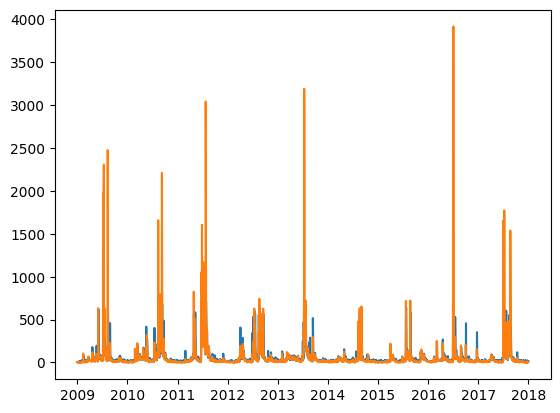

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:])
plt.plot(train_results['Actuals'][:])

In [ ]:
val_predictions = model1.predict(validX).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':validY})
val_results

58/58 [==============================] - 0s 3ms/step


,Val Predictions,Actuals
날짜,,
2018-01-01,6.463945,2.894
2018-01-02,6.545625,0.000
2018-01-03,6.635624,0.000
2018-01-04,4.827671,8.841
2018-01-05,4.827671,3.292
...,...,...
2022-12-27,8.821900,9.218
2022-12-28,13.465624,4.597
2022-12-29,11.628160,7.110


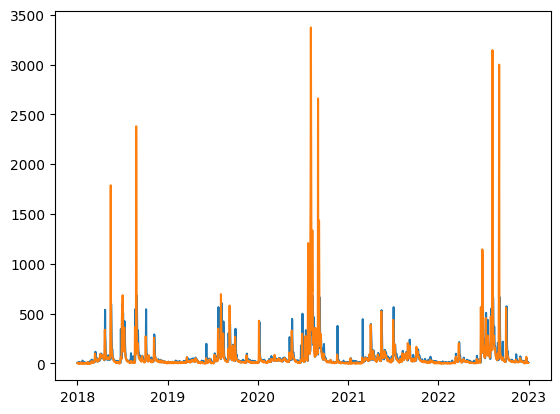

In [ ]:
plt.plot(val_results['Val Predictions'][:])
plt.plot(val_results['Actuals'][:])


In [ ]:
test_predictions = model1.predict(testX).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':testY})
test_results

12/12 [==============================] - 0s 3ms/step


,Test Predictions,Actuals
날짜,,
2023-01-01,10.100650,3.597
2023-01-02,8.723716,4.283
2023-01-03,7.241581,1.909
2023-01-04,7.796148,7.096
2023-01-05,5.861915,3.040
...,...,...
2023-12-25,31.916883,25.873
2023-12-26,28.753279,21.186
2023-12-27,25.270182,20.887


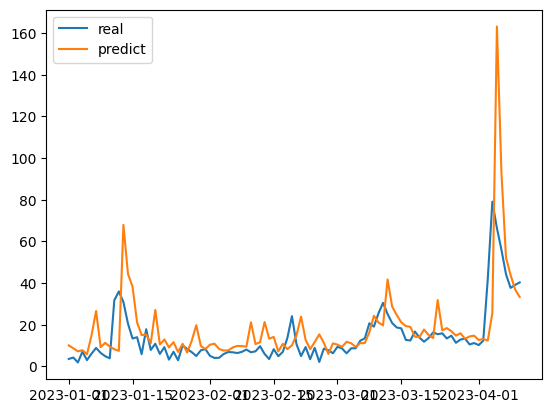

In [ ]:
plt.plot(test_results['Actuals'][:100])
plt.plot(test_results['Test Predictions'][:100])
plt.legend(['real', 'predict'])